In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import random

from model import encoder, decoder
from data_loader import DataLoaderforReconstOpt, DataLoaderforLatentOpt, DataLoaderforVocoder
from utils import connect

from config import wave_len
from config import window_size
from config import data_dim
from config import latent_dim
from config import batch_size

(10370160, 2) 48000


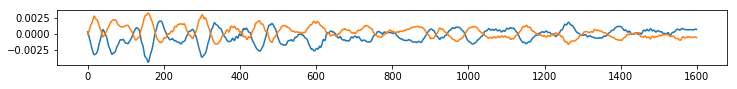

['../VoiceData/tamaneuta/trim_data/utama1.wav',
 '../VoiceData/tamaneuta/trim_data/utama2.wav',
 '../VoiceData/tamaneuta/trim_data/utama3.wav',
 '../VoiceData/tamaneuta/trim_data/utama4.wav',
 '../VoiceData/tamaneuta/trim_data/utama5.wav',
 '../VoiceData/tamaneuta/trim_data/utama6.wav',
 '../VoiceData/tamaneuta/trim_data/utama7.wav',
 '../VoiceData/tamaneuta/trim_data/utama8.wav',
 '../VoiceData/tamaneuta/trim_data/utama9.wav']

In [2]:
import soundfile as sf
import os

path = "../VoiceData/tamaneuta/trim_data/"
files = sorted(os.listdir(path))
files = [path + file for file in files]

data, rate = sf.read(files[0]) # rate == 48000 # samplerate:1秒あたりのフレーム数
print(data.shape, rate) # rateは最後のvocoder時に使う
plt.figure(figsize=(12,1))
plt.plot(data[10000:10000+wave_len])
plt.show()

files

In [3]:
inputs = tf.placeholder(tf.float32, (None, wave_len, data_dim))

with tf.variable_scope('encoder', reuse=tf.AUTO_REUSE):
    encoded = encoder(tf.reshape(inputs, (-1, wave_len, 1, data_dim)))

with tf.variable_scope('decoder', reuse=tf.AUTO_REUSE):
    decoded = tf.reshape(decoder(encoded), (-1, wave_len, data_dim))

variables =  tf.trainable_variables()
decoder_vars = [var for var in variables if 'decoder/' in var.name]

In [4]:
lr = 8e-4
beta1= 0.5
beta2 = 0.9

rec_loss = tf.reduce_mean(tf.pow(inputs - decoded, 2))
rec_opt = tf.train.AdamOptimizer(learning_rate=0.001).minimize(rec_loss)

【wave】
amp: 0.03912353515625


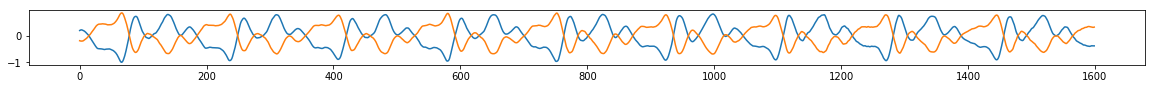

--------------------------------------------------------------------------------
amp: 0.031829833984375


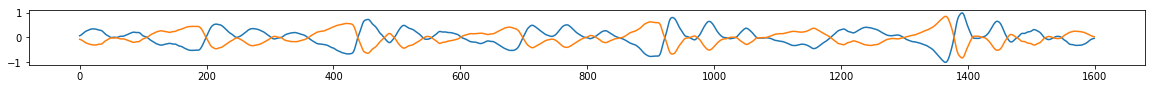

--------------------------------------------------------------------------------
amp: 0.0230712890625


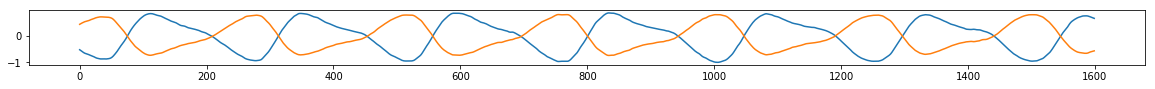

--------------------------------------------------------------------------------
amp: 0.046722412109375


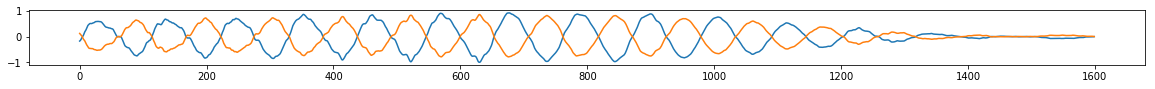

--------------------------------------------------------------------------------
【amp】 # max(amp)==0.231170654296875, mean(amp)==0.03972586824798449


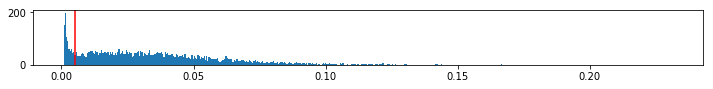

data.shape == (5667, 1600, 2)
amp.shape == (5667,)


In [5]:
data_loader_rec = DataLoaderforReconstOpt(files)
_ = data_loader_rec.load(0, DEMO=True)

In [6]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

saver = tf.train.Saver() # tf.train.Saver(decoder_vars)
# saver.restore(sess, './model/model-3')

epoch = 0

In [7]:
max_epoch = 3

In [8]:
from tqdm import tqdm

data_loader_rec = DataLoaderforReconstOpt(files)

for _ in range(epoch, max_epoch):    
    for file in range(len(files)):
        data, _ = data_loader_rec.load(file)
        rec_loss_hist = []
        for index in tqdm(range(0,len(data), batch_size)):
            batch = data[index:index+batch_size]
            
            _, _rec_loss = sess.run([rec_opt, rec_loss], {inputs: batch})
            
            rec_loss_hist.append(_rec_loss)
        print("epoch:", epoch+1, "file:", file+1, ", rec_loss:", np.mean(rec_loss_hist))
    saver.save(sess, './model/model', global_step=epoch+1)
    epoch += 1

100%|██████████| 45/45 [00:13<00:00,  3.29it/s]


epoch: 1 file: 1 , rec_loss: 0.06875636


  0%|          | 0/47 [00:00<?, ?it/s]

epoch: 1 file: 2 , rec_loss: 0.027571708


  0%|          | 0/45 [00:00<?, ?it/s]

epoch: 1 file: 3 , rec_loss: 0.018395863


  0%|          | 0/48 [00:00<?, ?it/s]

epoch: 1 file: 4 , rec_loss: 0.015169705


100%|██████████| 48/48 [00:13<00:00,  3.44it/s]


epoch: 1 file: 5 , rec_loss: 0.011894139


  0%|          | 0/48 [00:00<?, ?it/s]

epoch: 1 file: 6 , rec_loss: 0.016395904


  0%|          | 0/45 [00:00<?, ?it/s]

epoch: 1 file: 7 , rec_loss: 0.013284889


  0%|          | 0/45 [00:00<?, ?it/s]

epoch: 1 file: 8 , rec_loss: 0.011185777


100%|██████████| 45/45 [00:12<00:00,  3.59it/s]


epoch: 1 file: 9 , rec_loss: 0.010224126


  0%|          | 0/49 [00:00<?, ?it/s]

epoch: 2 file: 1 , rec_loss: 0.007592504


  0%|          | 0/47 [00:00<?, ?it/s]

epoch: 2 file: 2 , rec_loss: 0.007754685


  0%|          | 0/45 [00:00<?, ?it/s]

epoch: 2 file: 3 , rec_loss: 0.008569318


  0%|          | 0/48 [00:00<?, ?it/s]

epoch: 2 file: 4 , rec_loss: 0.00896926


  0%|          | 0/50 [00:00<?, ?it/s]

epoch: 2 file: 5 , rec_loss: 0.008534156


  0%|          | 0/48 [00:00<?, ?it/s]

epoch: 2 file: 6 , rec_loss: 0.012475419


  0%|          | 0/45 [00:00<?, ?it/s]

epoch: 2 file: 7 , rec_loss: 0.010738258


  0%|          | 0/45 [00:00<?, ?it/s]

epoch: 2 file: 8 , rec_loss: 0.009567268


100%|██████████| 45/45 [00:13<00:00,  3.44it/s]


epoch: 2 file: 9 , rec_loss: 0.008304963


  0%|          | 0/49 [00:00<?, ?it/s]

epoch: 3 file: 1 , rec_loss: 0.007131079


  0%|          | 0/47 [00:00<?, ?it/s]

epoch: 3 file: 2 , rec_loss: 0.0068695107


  0%|          | 0/46 [00:00<?, ?it/s]

epoch: 3 file: 3 , rec_loss: 0.007466025


  0%|          | 0/48 [00:00<?, ?it/s]

epoch: 3 file: 4 , rec_loss: 0.00817639


  0%|          | 0/50 [00:00<?, ?it/s]

epoch: 3 file: 5 , rec_loss: 0.009173628


  0%|          | 0/48 [00:00<?, ?it/s]

epoch: 3 file: 6 , rec_loss: 0.011096223


  0%|          | 0/45 [00:00<?, ?it/s]

epoch: 3 file: 7 , rec_loss: 0.010066903


  0%|          | 0/45 [00:00<?, ?it/s]

epoch: 3 file: 8 , rec_loss: 0.008652219


100%|██████████| 45/45 [00:12<00:00,  3.49it/s]

epoch: 3 file: 9 , rec_loss: 0.0076679755


In [9]:
saver.save(sess, './model/model', global_step=epoch)

'./model/model-3'

inputs -> decoded
amp: 0.03692626953125


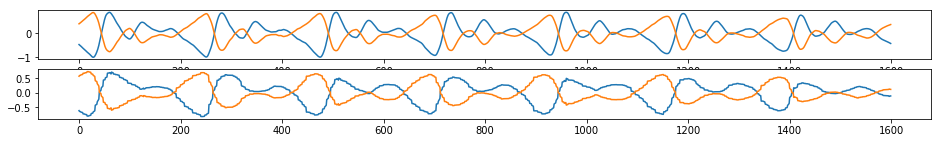

amp: 0.007537841796875


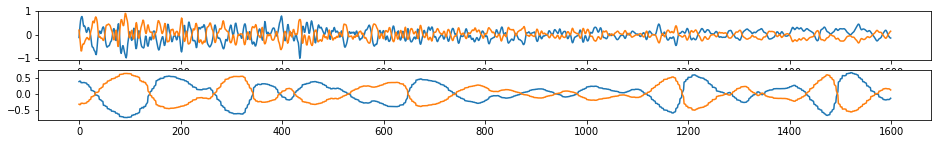

amp: 0.051239013671875


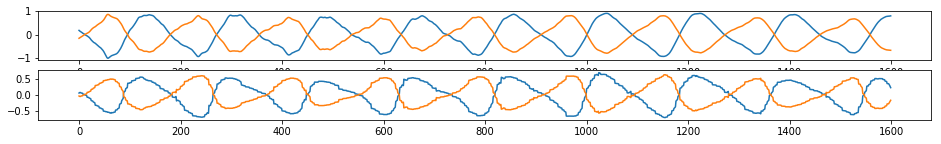

amp: 0.008026123046875


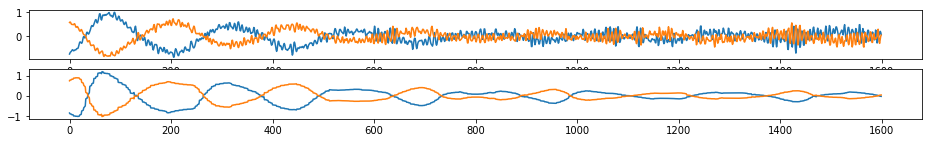

In [9]:
data_loader_rec = DataLoaderforReconstOpt(files)
data, amp = data_loader_rec.load(0)

print("inputs -> decoded")

for i in range(4):

    index = np.random.choice(len(data))
    x = data[index]
    a = amp[index]
    print("amp:", a)

    _x = x.reshape(wave_len, data_dim)
    plt.figure(figsize=(16,2));
    plt.subplot(2,1,1); plt.plot(_x);

    x = sess.run(decoded, {inputs: [_x]})
    plt.subplot(2,1,2); plt.plot(x[0]); plt.show()

### AutoEncode

In [10]:
from tqdm import tqdm

data_loader_voc = DataLoaderforVocoder(files)

ae_data = []

print("autoencoding...")

for fi in range(1):
    batch_size = 128
    data, amp = data_loader_voc.load(fi)

    for index in tqdm(range(0, len(data), batch_size)):
        batch_data = data[index:index+batch_size]
        batch_amp = amp[index:index+batch_size]
        _ae_data = sess.run(decoded, {inputs: batch_data})
        if not _ae_data.shape == (batch_size, 1600,2):
            continue
        ae_data.extend(_ae_data*batch_amp.reshape(-1,1,1))       

ae_data = np.array(ae_data)
print("ae_data.shape ==", ae_data.shape)

print("connecting...")

concat_data = [ae_data[0, 60:-20]]

for _ae_data in tqdm(ae_data[1:]):
    _ae_data = _ae_data[20:-20] # 新しいデータ。最初と最後は切り捨てておく。(1560, 2)
    a = concat_data[-1][-40:] # 古いデータの尻。(40, 2)
    b = _ae_data[:40] # 新しいデータの頭。(40, 2)
    concat_data[-1][-40:,0] = connect(a[:,0],b[:,0]) # 古いデータを上書き
    concat_data[-1][-40:,1] = connect(a[:,1],b[:,1]) # 古いデータを上書き
    
    concat_data.append(_ae_data[40:])

print("writing...")

concat_data = np.array(concat_data).reshape(-1, data_dim)
sf.write("sample/2_ae-long-3ep.wav", concat_data, rate)

print("done")

  0%|          | 0/54 [00:00<?, ?it/s]

autoencoding...


 17%|█▋        | 1123/6783 [00:00<00:00, 11220.51it/s]

ae_data.shape == (6784, 1600, 2)
connecting...


100%|██████████| 6783/6783 [00:00<00:00, 10609.60it/s]


writing...
done


### Encoder
- 潜在空間への写像の様子をプロット

100%|██████████| 45/45 [00:02<00:00, 18.49it/s]


(5632, 1024)


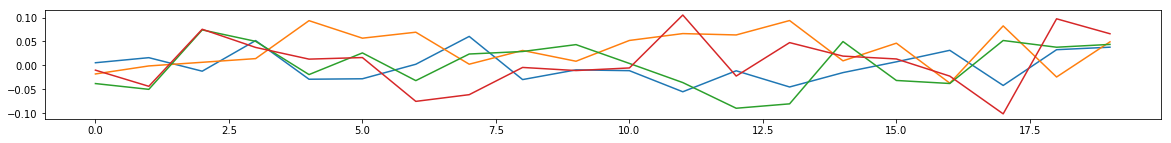

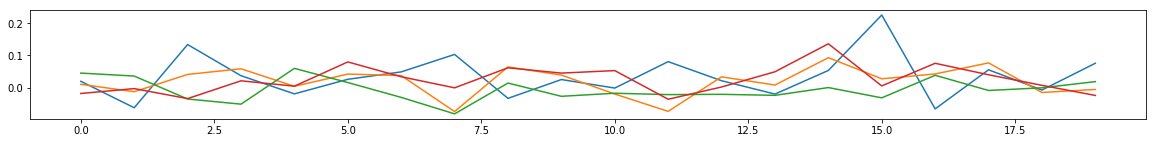

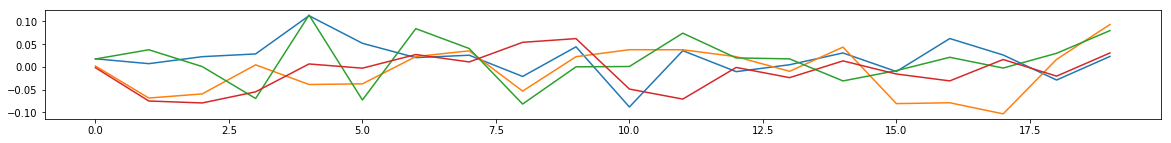

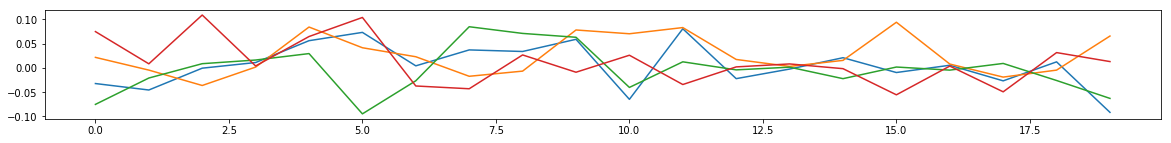

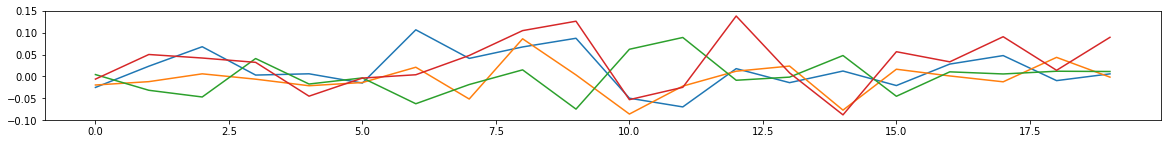

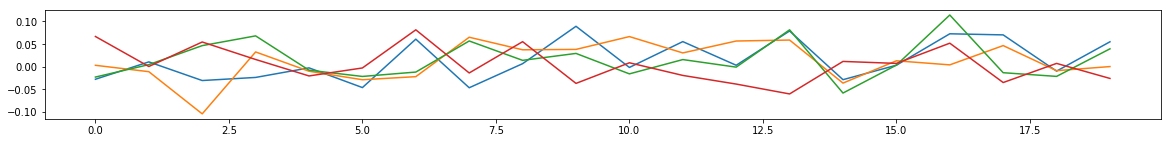

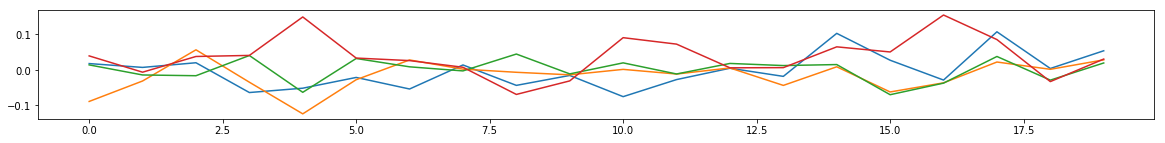

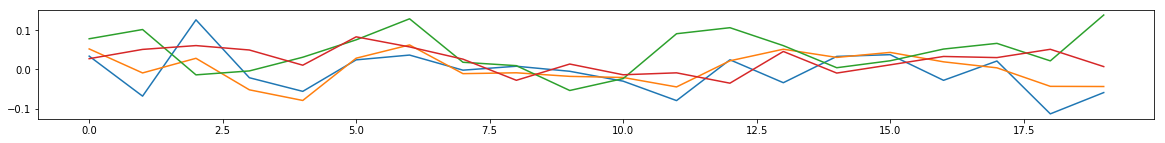

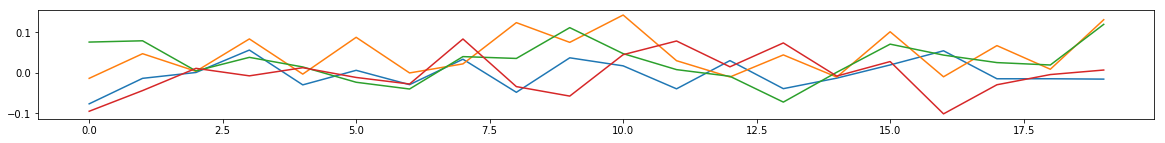

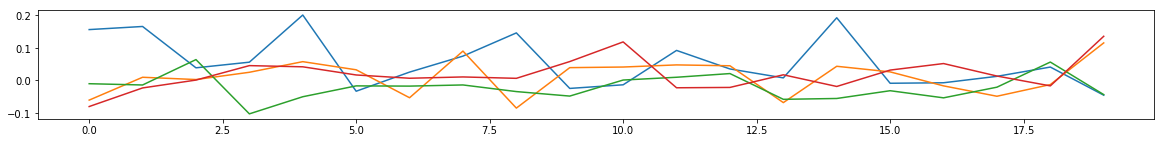

In [11]:
data_loader_rec = DataLoaderforReconstOpt(files)

ae_data = []

for fi in range(1):
    batch_size = 128
    data, amp = data_loader_rec.load(fi)
    
#     print(data.shape) # (5702, 1600, 2)
    for index in tqdm(range(0, len(data), batch_size)):
        batch_data = data[index:index+batch_size]
        batch_amp = amp[index:index+batch_size]
#         print(batch_data.shape) # (128, 1600, 2)
        _ae_data = sess.run(encoded, {inputs: batch_data})
#         print(_ae_data.shape) # (128, 64)
        
        if not _ae_data.shape == (batch_size, latent_dim):
            continue
        ae_data.extend(_ae_data)

ae_data = np.array(ae_data)
print(ae_data.shape)

for i in range(10):
    plt.figure(figsize=(20,2))
    _s = np.random.randint(len(ae_data)-10)
    _e = _s+20
    plt.plot(ae_data[_s:_e,i:i+4])
    plt.show()